<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Справочные-материалы-(Удалить-по-завершению)" data-toc-modified-id="Справочные-материалы-(Удалить-по-завершению)-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Справочные материалы (Удалить по завершению)</a></span></li></ul></li><li><span><a href="#Импорты-библиотек" data-toc-modified-id="Импорты-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорты библиотек</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Распределение-по-классам" data-toc-modified-id="Распределение-по-классам-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Распределение по классам</a></span></li><li><span><a href="#Токенизация.-Распределение-по-токенам.Полный-датасет" data-toc-modified-id="Токенизация.-Распределение-по-токенам.Полный-датасет-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Токенизация. Распределение по токенам.Полный датасет</a></span><ul class="toc-item"><li><span><a href="#Препроцессинг" data-toc-modified-id="Препроцессинг-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Препроцессинг</a></span></li><li><span><a href="#Отдельные-слова" data-toc-modified-id="Отдельные-слова-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Отдельные слова</a></span></li><li><span><a href="#Биграммы" data-toc-modified-id="Биграммы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Биграммы</a></span></li><li><span><a href="#Триграммы" data-toc-modified-id="Триграммы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Триграммы</a></span></li></ul></li><li><span><a href="#Токеназация.-Распределение-по-токенам.-Только-токсичная-часть-датасета" data-toc-modified-id="Токеназация.-Распределение-по-токенам.-Только-токсичная-часть-датасета-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Токеназация. Распределение по токенам. Только токсичная часть датасета</a></span><ul class="toc-item"><li><span><a href="#Отдельные-слова" data-toc-modified-id="Отдельные-слова-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Отдельные слова</a></span></li><li><span><a href="#Биграммы" data-toc-modified-id="Биграммы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Биграммы</a></span></li><li><span><a href="#Триграммы" data-toc-modified-id="Триграммы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Триграммы</a></span></li></ul></li><li><span><a href="#NER" data-toc-modified-id="NER-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>NER</a></span><ul class="toc-item"><li><span><a href="#Географические-регионы" data-toc-modified-id="Географические-регионы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Географические регионы</a></span></li><li><span><a href="#Имена-собственные" data-toc-modified-id="Имена-собственные-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Имена собственные</a></span></li></ul></li><li><span><a href="#Обучение-моделей.-Классификация" data-toc-modified-id="Обучение-моделей.-Классификация-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей. Классификация</a></span></li></ul></div>

Датасет взят по ссылке:

https://www.kaggle.com/c/jigsaw-multilingual-toxic-comment-classification/data

#### Справочные материалы (Удалить по завершению)

Биграммы <br>
https://stackoverflow.com/questions/26887745/creating-ngrams-from-scikit-learn-and-count-vectorizer-throws-memory-error

### Импорты библиотек

In [8]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open

import pandas as pd
from collections import Counter
import numpy as np
from tqdm import tqdm
from scipy import stats as st

#visualization
import matplotlib.pyplot as plt
import seaborn as sns


#nltk
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


#gensim
import gensim
from gensim.models import Word2Vec




#texts
import re
import spacy

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model


#pickle
import pickle


In [9]:
data= pd.read_csv('datasets/jigsaw-toxic-comment-train.csv')

In [12]:
pd.set_option("max_colwidth", None)
data[['id','comment_text']].head()

,id,comment_text
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?"


In [13]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Пропуски

In [14]:
data.isnull().mean()

id               0.0
comment_text     0.0
toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
dtype: float64

Пропусков нет.

#### Дубликаты

In [15]:
data.duplicated().sum()

0

Дубликаты отсутствуют

### Распределение по классам

In [16]:
data['toxic'].value_counts(normalize=True)

2022-03-05 18:56:17,632 : INFO : Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-03-05 18:56:17,633 : INFO : NumExpr defaulting to 8 threads.


0    0.904343
1    0.095657
Name: toxic, dtype: float64

In [17]:
#Напишем функции и всмомогателные параметры для определения распределния комментариев
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
# Creating color parameters
colors = ( "purple", "red")

# Creating explode data
explode = (0.3, 0.0)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

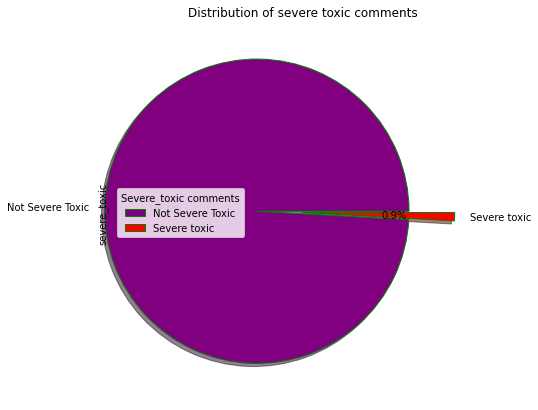

In [18]:
fig, ax = plt.subplots(figsize =(15, 7))
data['severe_toxic'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not Severe Toxic','Severe toxic'],colors=colors, wedgeprops = wp)
ax.legend(title="Severe_toxic comments",loc ="center left",)
ax.set_title("Distribution of severe toxic comments")
plt.show()

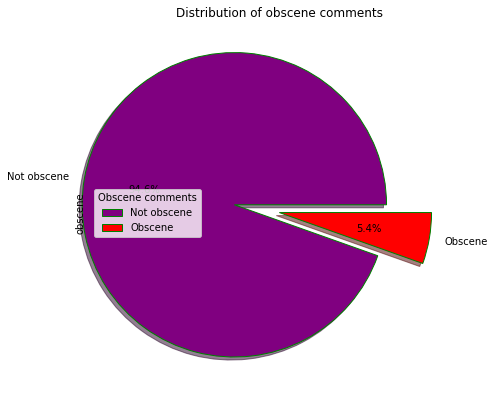

In [19]:
#Распределение непристойных комментариев
fig, ax = plt.subplots(figsize =(15, 7))
data['obscene'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not obscene','Obscene'],colors=colors, wedgeprops = wp)
ax.legend(title="Obscene comments",loc ="center left",)
ax.set_title("Distribution of obscene comments")
plt.show()

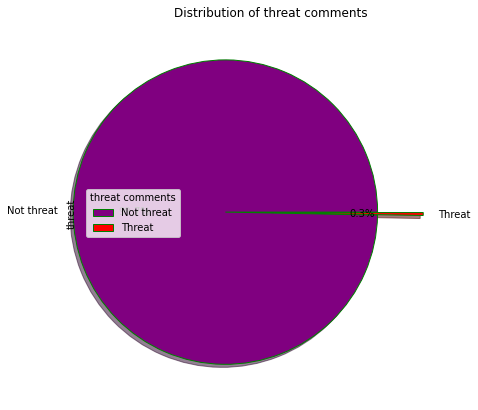

In [20]:
fig, ax = plt.subplots(figsize =(15, 7))
data['threat'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not threat','Threat'],colors=colors, wedgeprops = wp)
ax.legend(title="threat comments",loc ="center left",)
ax.set_title("Distribution of threat comments")
plt.show()

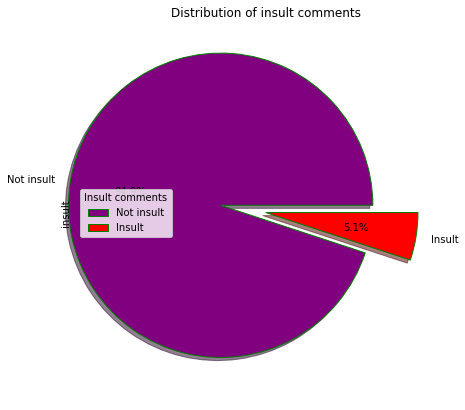

In [21]:
fig, ax = plt.subplots(figsize =(15, 7))
data['insult'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not insult','Insult'],colors=colors, wedgeprops = wp)
ax.legend(title="Insult comments",loc ="center left",)
ax.set_title("Distribution of insult comments")
plt.show()

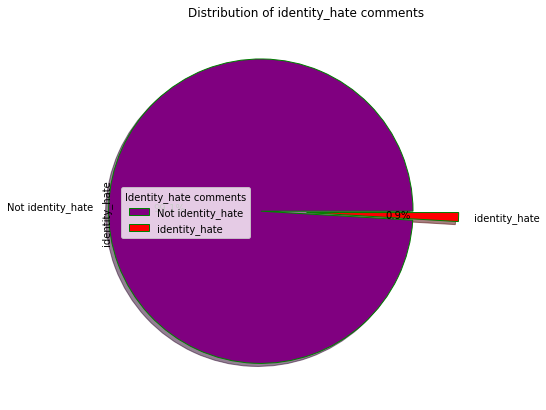

In [22]:
fig, ax = plt.subplots(figsize =(15, 7))
data['identity_hate'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not identity_hate','identity_hate'],colors=colors, wedgeprops = wp)
ax.legend(title="Identity_hate comments",loc ="center left",)
ax.set_title("Distribution of identity_hate comments")
plt.show()

Таким образом, токсичных комментариев в целом немного. 

### Токенизация. Распределение по токенам.Полный датасет

In [23]:
corpus = data['comment_text'].values

In [24]:
#Напишем фукнцию лемматизации
def lemmatization(texts):
    nlp = spacy.load("en_core_web_sm")
    texts_out = []
    for text in tqdm(texts):
        doc = nlp(text)
        new_text = []
        for token in doc:
            new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [25]:
lemmatized_texts=lemmatization(corpus)
print(corpus[0:10])

100%|██████████████████████████████████████████████████████████████████████████| 223549/223549 [48:32<00:00, 76.74it/s]

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 '"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on refe

In [26]:
with open("lemmatized_texts.pkl", "wb") as f:
    pickle.dump(lemmatized_texts, f)

In [173]:
# with open("lemmatized_texts.pkl", "rb") as f:
#     lemmatized_texts = pickle.load(f)

In [27]:
lemmatized_texts[0:10]

['Explanation \n why the edit make under my username Hardcore Metallica Fan be revert ? they be not vandalism , just closure on some gas after I vote at New York Dolls FAC . and please do not remove the template from the talk page since I be retire now.89.205.38.27',
 "D'aww ! he match this background colour I be seemingly stuck with . thank .   ( talk ) 21:51 , January 11 , 2016 ( UTC )",
 'hey man , I be really not try to edit war . it be just that this guy be constantly remove relevant information and talk to I through edit instead of my talk page . he seem to care more about the formatting than the actual info .',
 '" \n More \n I can not make any real suggestion on improvement - I wonder if the section statistic should be later on , or a subsection of " " type of accident " "   -i think the reference may need tidy so that they be all in the exact same format ie date format etc . I can do that later on , if no - one else do first - if you have any preference for format style on ref

In [28]:
def clear_text(text):
    return " ".join(re.sub(r'[^a-zA-Z ]', ' ', text).split())

#### Препроцессинг

In [29]:
stop_words = set(stopwords.words('english'))

In [30]:
preprocessed_corpus=[]

In [31]:
for i in tqdm(range(len(lemmatized_texts))):
    preprocessed_corpus.append((clear_text(str.lower(lemmatized_texts[i]))))

100%|███████████████████████████████████████████████████████████████████████| 223549/223549 [00:03<00:00, 69208.37it/s]


#### Отдельные слова 

In [32]:
%%time
count_vect = CountVectorizer(stop_words=stop_words) 
bow = count_vect.fit_transform(preprocessed_corpus) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (223549, 210766)
Wall time: 8.89 s


In [34]:
%%time
word_list=count_vect.get_feature_names() 
count_list = bow.sum(axis=0).A1


Wall time: 219 ms


In [35]:
x = dict(zip(word_list,count_list))
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series = pd.Series(g)

In [36]:
result_series[0:20]

article      101461
page          75286
wikipedia     63649
would         50043
talk          48934
edit          46002
use           45270
one           42211
make          41301
please        39911
like          39567
see           37388
say           35003
think         34766
know          32622
source        32251
thank         31378
go            29831
also          28097
get           27901
dtype: int64

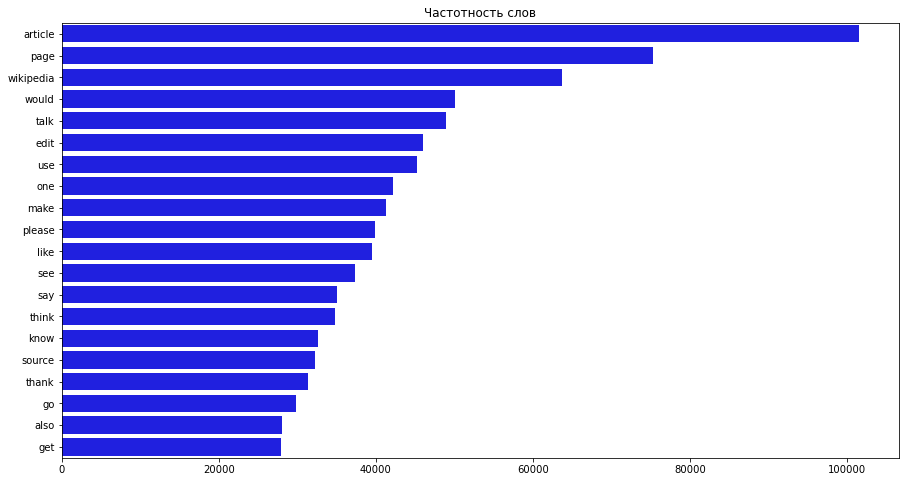

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series[0:20].index, x=result_series[0:20].values,color='blue')
plt.title("Частотность слов")
plt.show()

#### Биграммы

In [38]:
%%time
count_vect = CountVectorizer(ngram_range=(2, 2),stop_words=stop_words) 
bow = count_vect.fit_transform(preprocessed_corpus) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (223549, 3071829)
Wall time: 21.7 s


In [39]:
%%time
word_list=count_vect.get_feature_names() 
count_list = bow.sum(axis=0).A1

Wall time: 3.56 s


In [40]:
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series = pd.Series(g)

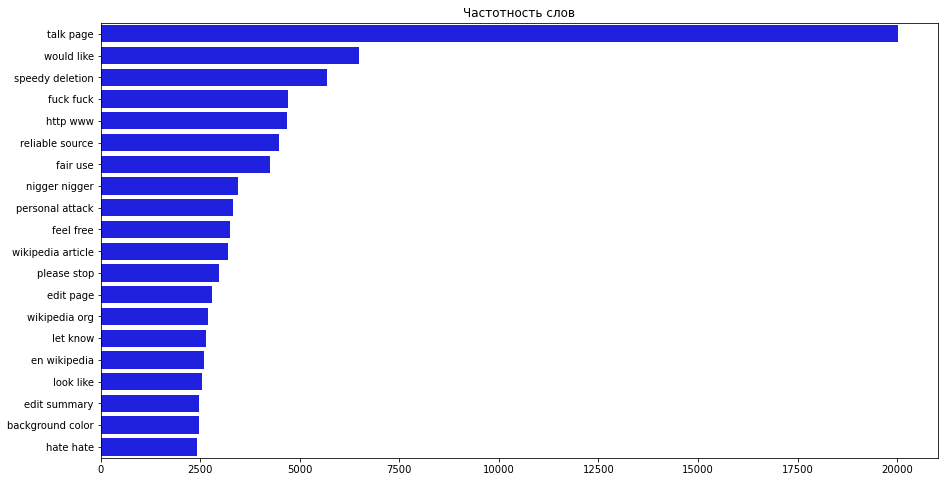

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series[0:20].index, x=result_series[0:20].values,color='blue')
plt.title("Частотность биграмм")
plt.show()

#### Триграммы

In [42]:
%%time
count_vect = CountVectorizer(ngram_range=(3, 3),stop_words=stop_words) 
bow = count_vect.fit_transform(preprocessed_corpus) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (223549, 5688052)
Wall time: 32 s


In [43]:
%%time
word_list=count_vect.get_feature_names() 
count_list = bow.sum(axis=0).A1

Wall time: 8.81 s


In [44]:
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series = pd.Series(g)

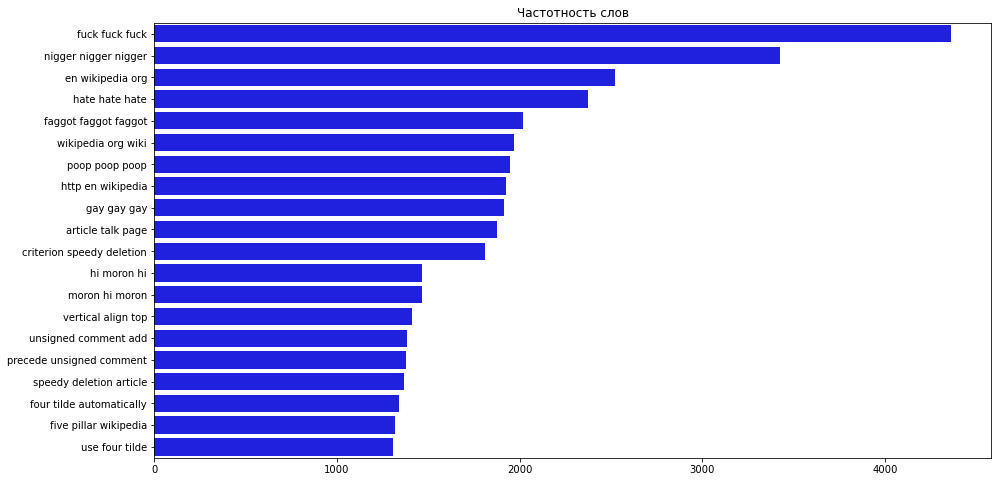

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series[0:20].index, x=result_series[0:20].values,color='blue')
plt.title("Частотность триграмм")
plt.show()

### Токеназация. Распределение по токенам. Только токсичная часть датасета

In [46]:
#Загрузим только токсичную часть датасета
with open("only_bad_lemmatized_texts.pkl", "rb") as f:
    only_bad_lemmatized_texts = pickle.load(f)

In [47]:
preprocessed_bad_corpus=[]

In [48]:
for i in tqdm(range(len(only_bad_lemmatized_texts))):
    preprocessed_bad_corpus.append((clear_text(str.lower(only_bad_lemmatized_texts[i]))))

100%|█████████████████████████████████████████████████████████████████████████| 22468/22468 [00:00<00:00, 96675.88it/s]


#### Отдельные слова 

In [49]:
%%time
count_vect = CountVectorizer(stop_words=stop_words) 
bow = count_vect.fit_transform(preprocessed_bad_corpus) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (22468, 35960)
Wall time: 1.05 s


In [50]:
%%time
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)

Wall time: 17.3 s


In [51]:
x = dict(zip(word_list,count_list))
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series_bad = pd.Series(g)

In [52]:
result_series_bad[0:20]

fuck         16953
nigger        6187
suck          5918
go            5379
like          5196
shit          5021
wikipedia     4560
fucking       4435
ass           4142
faggot        4078
get           3989
die           3969
hate          3927
gay           3678
bitch         3588
page          3527
dick          3430
know          3316
make          2787
people        2692
dtype: int64

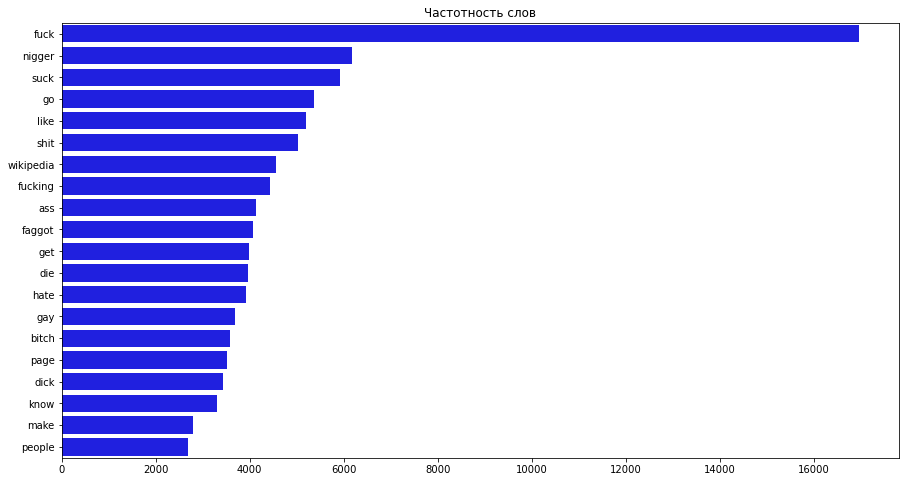

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series_bad[0:20].index, x=result_series_bad[0:20].values,color='blue')
plt.title("Частотность слов")
plt.show()

#### Биграммы

In [53]:
%%time
count_vect_bigram = CountVectorizer(ngram_range=(2, 2),stop_words=stop_words) 
bow_bigram = count_vect_bigram.fit_transform(preprocessed_bad_corpus) 
print("Размер мешка без учёта стоп-слов:", bow_bigram.shape)

Размер мешка без учёта стоп-слов: (22468, 281473)
Wall time: 1.61 s


In [54]:
%%time
word_list_bigrams=count_vect_bigram.get_feature_names() 

Wall time: 290 ms


In [55]:
count_list_bigrams=bow_bigram.sum(axis=0).A1 #А1 returns flattened matrix 
x=dict(zip(word_list_bigrams,count_list_bigrams))

In [56]:
x = dict(zip(word_list_bigrams,count_list_bigrams))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series_Bigram = pd.Series(g)

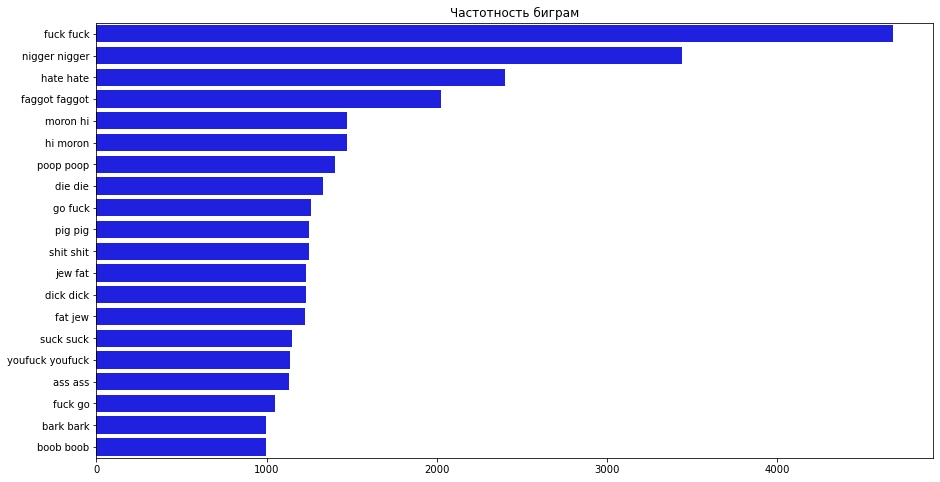

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series_Bigram[0:20].index, x=result_series_Bigram[0:20].values,color='blue')
plt.title("Частотность биграм")
plt.show()

#### Триграммы

In [58]:
%%time
count_vect_threegram = CountVectorizer(ngram_range=(3, 3),stop_words=stop_words) 
bow_threegram = count_vect_threegram.fit_transform(preprocessed_bad_corpus) 

print("Размер мешка без учёта стоп-слов:", bow_threegram.shape)

Размер мешка без учёта стоп-слов: (22468, 363384)
Wall time: 1.64 s


In [59]:
%%time
word_list_threegram=count_vect_threegram.get_feature_names() 

Wall time: 350 ms


In [60]:
count_list_threegram=bow_threegram.sum(axis=0).A1 #А1 returns flattened matrix 
x=dict(zip(word_list_threegram,count_list_threegram))

In [61]:
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series_threegram = pd.Series(g)

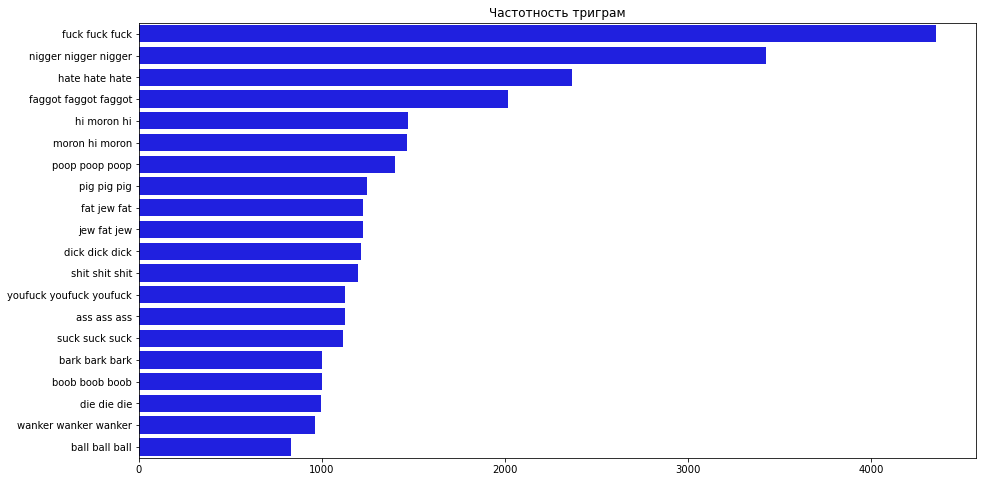

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series_threegram[0:20].index, x=result_series_threegram[0:20].values,color='blue')
plt.title("Частотность триграм")
plt.show()

?Как сделать чтобы слова не повторялись?

### NER

#### Географические регионы

In [63]:
nlp = spacy.load("en_core_web_sm")

In [67]:
%%time
location=list()
for i in tqdm(range(len(preprocessed_bad_corpus))):
    doc=nlp(str(preprocessed_bad_corpus[i]))
    for ent in doc.ents:
        if ent.label_ =='GPE':
            location.append((ent.lemma_.capitalize()))

100%|███████████████████████████████████████████████████████████████████████████| 22468/22468 [03:30<00:00, 106.58it/s]

Wall time: 3min 30s


In [68]:
location_dict=Counter(location)

In [69]:
location_dict={k: v for k, v in sorted(location_dict.items(), key=lambda item: item[1],reverse=True)}
location_series = pd.Series(location_dict)

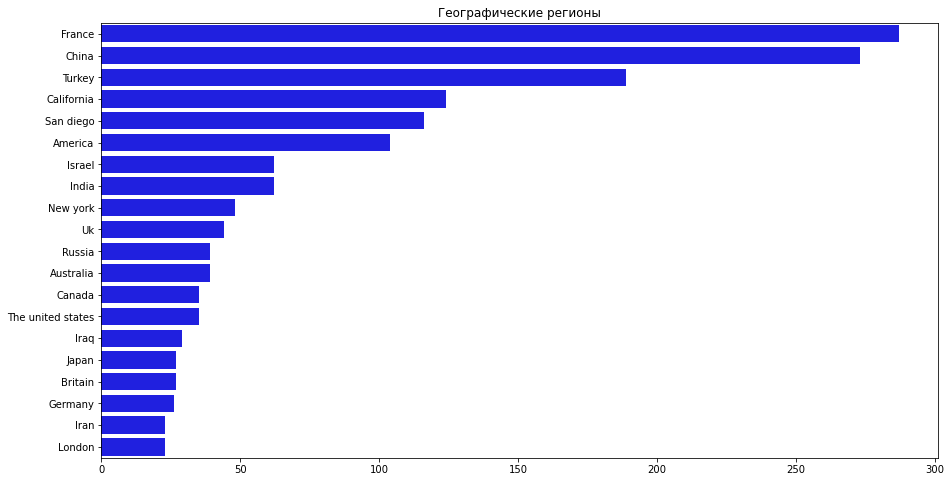

In [70]:
plt.figure(figsize=(15,8))
sns.barplot(y=location_series[0:20].index, x=location_series[0:20].values,color='blue')
plt.title("Географические регионы")
plt.show()

#### Имена собственные

In [73]:
#Проверим работу библиотеки для поиска имен'
text='Ivan travelled to Berlin, than to Moscow. Greace is country. Apple is company. John is name'
doc=nlp(text)
location=set()
for ent in doc.ents:
    if ent.label_ =='PERSON':
        location.add(ent.lemma_.capitalize())
location

{'John'}

In [74]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Berlin 18 24 GPE
Moscow 34 40 GPE
Greace 42 48 ORG
Apple 61 66 ORG
John 79 83 PERSON


In [75]:
%%time
names=list()
for i in tqdm(range(len(preprocessed_bad_corpus))):
    doc=nlp(str(preprocessed_bad_corpus[i]))
    for ent in doc.ents:
        if ent.label_ =='PERSON':
            names.append((ent.lemma_.capitalize()))

100%|███████████████████████████████████████████████████████████████████████████| 22468/22468 [03:28<00:00, 107.67it/s]

Wall time: 3min 28s


In [76]:
names_dict=Counter(names)

In [77]:
names_dict={k: v for k, v in sorted(names_dict.items(), key=lambda item: item[1],reverse=True)}
names_series = pd.Series(names_dict)

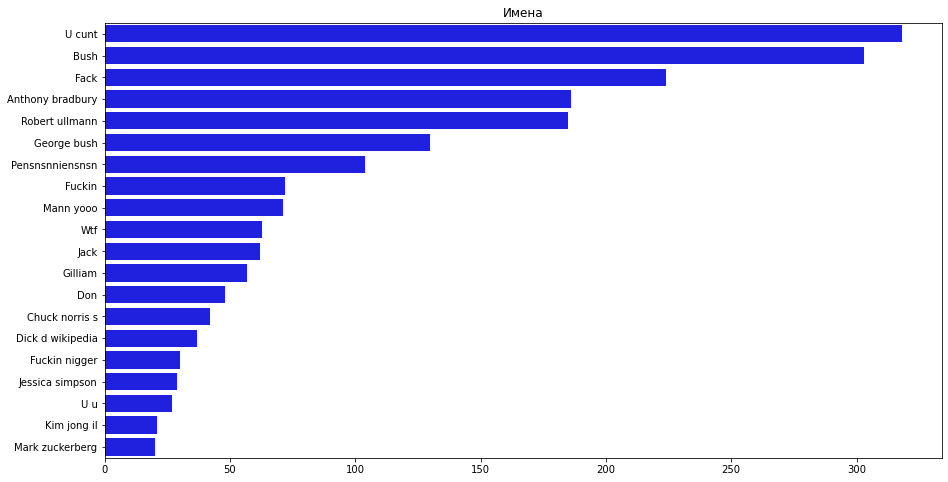

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(y=names_series[0:20].index, x=names_series[0:20].values,color='blue')
plt.title("Имена")
plt.show()

https://github.com/Donskov7/toxic_comments/blob/master/data/correct_words.csv <br>

Правильные версии слов

### Обучение моделей. Классификация

In [79]:
%%time 
wv = gensim.models.KeyedVectors.load_word2vec_format( "datasets/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

2022-03-05 20:33:01,982 : INFO : loading projection weights from datasets/GoogleNews-vectors-negative300.bin.gz
2022-03-05 20:33:47,550 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from datasets/GoogleNews-vectors-negative300.bin.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-03-05T20:33:47.547824', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}
<timed exec>:2: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
2022-03-05 20:33:53,997 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency


Wall time: 52.6 s


In [80]:
wv.most_similar('snake')  

[('snakes', 0.7513573169708252),
 ('reptile', 0.6885746717453003),
 ('lizard', 0.6872766017913818),
 ('python', 0.6606292724609375),
 ('cobra', 0.6488406658172607),
 ('rattlesnake', 0.6464701294898987),
 ('serpent', 0.6409707069396973),
 ('alligator', 0.6349284648895264),
 ('spider', 0.6340569257736206),
 ('poisonous_snake', 0.6305594444274902)]

In [89]:
features_train, features_test, target_train, target_test = train_test_split(np.array(preprocessed_corpus),data['toxic'], test_size=0.1, random_state=42)
len(features_train)

201194

In [90]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.key_to_index:
            mean.append(wv.syn0[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.layer1_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

In [83]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [92]:
features_train_tokenized = features_train.apply(lambda r: w2v_tokenize_text(r['toxic']), axis=1).values
features_test_tokenized = features_test.apply(lambda r: w2v_tokenize_text(r['toxic']), axis=1).values

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [85]:
%%time
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

NameError: name 'train_tokenized' is not defined

In [94]:
%%time
tf_vect = TfidfVectorizer(
    min_df=2, tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english')
train_data_features = tf_vect.fit_transform(preprocessed_corpus)

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features,target_train)

ValueError: Found input variables with inconsistent numbers of samples: [223549, 201194]

In [ ]:
%%time

predict(tf_vect, logreg, test_data)